In [1]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/JasonFeng98/FinTech590-RiskManagement/main/Week07/Project/problem2.csv", "problem2.csv")

In [2]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/JasonFeng98/FinTech590-RiskManagement/main/Week07/Project/DailyReturn.csv", "DailyReturn.csv")

In [3]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/JasonFeng98/FinTech590-RiskManagement/main/Week07/Project/F-F_Momentum_Factor_daily.CSV", "F-F_Momentum_Factor_daily.csv")

In [4]:
## from urllib.request import urlretrieve
## urlretrieve("https://raw.githubusercontent.com/JasonFeng98/FinTech590-RiskManagement/main/Week07/Project/F-F_Research_Data_Factors_daily.CSV", "F-F_Research_Data_Factors_daily.csv")

In [5]:
import pandas as pd
import numpy as np
from datetime import date
from scipy.stats import norm
import scipy.interpolate as si
import math
from numpy import linalg as LA
import scipy.stats as st

from sklearn.linear_model import LinearRegression

import seaborn as sn
import matplotlib.pyplot as plt
import scipy.optimize as sco

# Question 1

In [6]:
## Black_scholes
def black_scholes(S, K, T, r, b, sigma, option='call'):
    ###standard black-scholes formula
    d1 = (np.log(S / K) + (b + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    N = norm.cdf
    
    if option.lower() =='call':
        price = S * np.exp((b-r) * T) * N(d1) -  K * np.exp(-r * T) * N(d2)
    else:
        price = K * np.exp(-r * T) * N(-d2) - S * np.exp((b-r) * T) * N(-d1)
              
    return price

In [7]:
## Close form greeks for GBSM

In [8]:
## Delta
def delta(S, K, T, r, b, sigma, option='call'):
    
    # calculating d1 from black scholes
    d1 = (np.log(S / K) + (b + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    
    N = norm.cdf
    
    if option.lower() =='call':
        delta = np.exp((b-r) * T) * N(d1)
    elif option.lower() =='put':
        delta = np.exp((b-r) * T) * (N(d1) - 1)
    else:
        print("Please confirm option type.")
              
    return delta

In [9]:
## Gamma
def gamma(S, K, T, r, b, sigma):
        
        # no need to specify call or put.

    N_prime = norm.pdf
    
    ### calculating d1 from black scholes
    d1 = (np.log(S / K) + (b + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
    
    gamma = N_prime(d1) * np.exp((b-r) * T) / (S * sigma * np.sqrt(T))
    
    return gamma

In [10]:
## Vega
def vega(S, K, T, r, b, sigma): 
    
        # no need to specify call or put.
        # By put-call parity, put and call must have the same vega
    
    N_prime = norm.pdf
    
    ### calculating d1 from black scholes
    d1 = (np.log(S / K) + (b + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)

    vega = S  * np.exp((b-r) * T) * np.sqrt(T) * N_prime(d1)
    
    return vega

In [11]:
## theta
def theta(S, K, T, r, b, sigma, option='call'):
    d1 = (np.log(S / K) + (b + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    N = norm.cdf
    N_prime = norm.pdf
    
    if option.lower() =='call':
        theta = - (S * np.exp((b-r) * T) * N_prime(d1) * sigma) / (2 * np.sqrt(T)) \
                - (b-r) * S * np.exp((b-r) * T) * N(d1) \
                - r * K * np.exp(-r * T) * N(d2)   
        
    elif option.lower() =='put':
        theta = - (S * np.exp((b-r) * T) * N_prime(d1) * sigma) / (2 * np.sqrt(T)) \
                + (b-r) * S * np.exp((b-r) * T) * N(-d1) \
                + r * K * np.exp(-r * T) * N(-d2)   
        
    else:
        print("Please confirm option type.")
              
    return theta

In [12]:
## carryRho
def carryRho(S, K, T, r, b, sigma, option='call'):
    d1 = (np.log(S / K) + (b + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    
    N = norm.cdf
    
    if option.lower() =='call':
        carryRho = T * S * np.exp((b-r) * T) * N(d1)
    elif option.lower() =='put':
        carryRho = -T * S * np.exp((b-r) * T) * N(-d1)
    else:
        print("Please confirm option type.")
              
    return carryRho

In [13]:
def delta_fdm(S, K, T, r, b, sigma, option='call', ds=1e-09, method='central'):
    
    
    if option.lower() =='call':
        if method.lower() =='central':
            return (black_scholes(S+ds, K, T, r, b, sigma, 'call') \
                    - black_scholes(S-ds, K, T, r, b, sigma, 'call')) / ( 2 * ds)     
        
        elif method.lower() == 'forward':
            return (black_scholes(S+ds, K, T, r, b, sigma, 'call') \
                    - black_scholes(S, K, T, r, b, sigma, 'call')) / ds
       
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'call') \
                    - black_scholes(S-ds, K, T, r, b, sigma, 'call')) / ds
        
        else:
            print("Please confirm method chosen.")
    
    
    elif option.lower() =='put':
        if method.lower() =='central':
            return (black_scholes(S+ds, K, T, r, b, sigma, 'put') \
                    - black_scholes(S-ds, K, T, r, b, sigma, 'put')) / ( 2 * ds)
        
        elif method.lower() == 'forward':
            return (black_scholes(S+ds, K, T, r, b, sigma, 'put') \
                    - black_scholes(S, K, T, r, b, sigma, 'put')) / ds
        
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'put') \
                    - black_scholes(S-ds, K, T, r, b, sigma, 'put')) / ds
        else:
            print("Please confirm method chosen.")

        
    else:
        print("Please confirm option type.")

In [14]:
def gamma_fdm(S, K, T, r, b, sigma, ds=1e-09, method='central'):
    
    if method.lower() =='central':
            return (black_scholes(S+ds, K, T, r, b, sigma) - \
                    2 * black_scholes(S, K, T, r, b, sigma)+ black_scholes(S-ds, K, T, r, b, sigma)) / (ds**2)     
        
    elif method.lower() == 'forward':
        return (black_scholes(S+2*ds, K, T, r, b, sigma) - \
                2 * black_scholes(S+ds, K, T, r, b, sigma) + \
                black_scholes(S, K, T, r, b, sigma)) / (ds**2)     
       
    elif method.lower() == 'backward':
        return (black_scholes(S, K, T, r, b, sigma) - \
                2 * black_scholes(S-ds, K, T, r, b, sigma) + \
                black_scholes(S-2*ds, K, T, r, b, sigma)) / (ds**2)     
        
    else:
        print("Please confirm method chosen.")

In [15]:
def vega_fdm(S, K, T, r, b, sigma, dv=1e-09, method='central'):
    if method.lower() =='central':
        return (black_scholes(S, K, T, r, b, sigma+dv) - \
                    black_scholes(S, K, T, r, b, sigma-dv)) / (dv*2)     
        
    elif method.lower() == 'forward':
        return (black_scholes(S, K, T, r, b, sigma+dv) - \
                    black_scholes(S, K, T, r, b, sigma)) / (dv)     
       
    elif method.lower() == 'backward':
        return (black_scholes(S, K, T, r, b, sigma) - \
                    black_scholes(S, K, T, r, b, sigma-dv)) / (dv)       
        
    else:
        print("Please confirm method chosen.")

In [16]:
def theta_fdm(S, K, T, r, b, sigma, option='call', dt=1e-09, method='central'):
    
    if option.lower() =='call':
        if method.lower() =='central':
            return -(black_scholes(S, K, T+dt, r, b, sigma, 'call') - \
                     black_scholes(S, K, T-dt, r, b, sigma, 'call')) / ( 2 * dt)     
        
        elif method.lower() == 'forward':
            return -(black_scholes(S, K, T+dt, r, b, sigma, 'call') \
                    - black_scholes(S, K, T, r, b, sigma, 'call')) / dt
       
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'call') \
                    - black_scholes(S, K, T-dt, r, b, sigma, 'call')) / dt
        
        else:
            print("Please confirm method chosen.")
    
    
    elif option.lower() =='put':
        if method.lower() =='central':
            return -(black_scholes(S, K, T+dt, r, b, sigma, 'put') \
                    - black_scholes(S, K, T-dt, r, b, sigma, 'put')) / ( 2 * dt)     
        
        elif method.lower() == 'forward':
            return -(black_scholes(S, K, T+dt, r, b, sigma, 'put') \
                    - black_scholes(S, K, T, r, b, sigma, 'put')) / dt
       
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'put') \
                    - black_scholes(S, K, T-dt, r, b, sigma, 'put')) / dt
        
        else:
            print("Please confirm method chosen.")
        
    else:
        print("Please confirm option type.")

In [17]:
def rho_fdm(S, K, T, r, b, sigma, option='call', dr=1e-09, method='central'):
    
    if option.lower() =='call':
        if method.lower() =='central':
            return (black_scholes(S, K, T, r+dr, b, sigma, 'call') \
                    - black_scholes(S, K, T, r-dr, b, sigma, 'call')) / ( 2 * dr)     
        
        elif method.lower() == 'forward':
            return (black_scholes(S, K, T, r+dr, b, sigma, 'call') \
                    - black_scholes(S, K, T, r, b, sigma, 'call')) / dr
       
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'call') \
                    - black_scholes(S, K, T, r-dr, b, sigma, 'call')) / dr
        
        else:
            print("Please confirm method chosen.")
    
    
    elif option.lower() =='put':
        if method.lower() =='central':
            return (black_scholes(S, K, T, r+dr, b, sigma, 'put') \
                    - black_scholes(S, K, T, r-dr, b, sigma, 'put')) / ( 2 * dr)     
        
        elif method.lower() == 'forward':
            return (black_scholes(S, K, T, r+dr, b, sigma, 'put') \
                    - black_scholes(S, K, T, r, b, sigma, 'put')) / dr
       
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'put') \
                    - black_scholes(S, K, T, r-dr, b, sigma, 'put')) / dr
        
        else:
            print("Please confirm method chosen.")
        
    else:
        print("Please confirm option type.")

In [18]:
def carryRho_fdm(S, K, T, r, b, sigma, option='call', db=1e-09, method='central'):
    
    if option.lower() =='call':
        if method.lower() =='central':
            return (black_scholes(S, K, T, r, b+db, sigma, 'call') \
                    - black_scholes(S, K, T, r, b-db, sigma, 'call')) / ( 2 * db)     
        
        elif method.lower() == 'forward':
            return (black_scholes(S, K, T, r, b+db, sigma, 'call') \
                    - black_scholes(S, K, T, r, b, sigma, 'call')) / db
       
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'call') \
                    - black_scholes(S, K, T, r, b-db, sigma, 'call')) / db
        
        else:
            print("Please confirm method chosen.")
    
    
    elif option.lower() =='put':
        if method.lower() =='central':
            return (black_scholes(S, K, T, r, b+db, sigma, 'put') \
                    - black_scholes(S, K, T, r, b-db, sigma, 'put')) / ( 2 * db)     
        
        elif method.lower() == 'forward':
            return (black_scholes(S, K, T, r, b+db, sigma, 'put') \
                    - black_scholes(S, K, T, r, b, sigma, 'put')) / db
       
        elif method.lower() == 'backward':
            return (black_scholes(S, K, T, r, b, sigma, 'put') \
                    - black_scholes(S, K, T, r, b-db, sigma, 'put')) / db
        
        else:
            print("Please confirm method chosen.")
        
    else:
        print("Please confirm option type.")

In [19]:
## Basic American option function with binomial
def american_tree(K, T, S0, r, b, N, ivol, option):
    #precompute values
    dt = T / N
    u = np.exp(ivol * np.sqrt(dt))
    d = 1/u
    q = (np.exp(b*dt) - d)/(u-d)
    disc = np.exp(-r*dt)
    
    # initialise stock prices at maturity
    S = S0 * d**(np.arange(N,-1,-1)) * u**(np.arange(0,N+1,1))
        
    # option payoff 
    if option.lower() == 'put':
        C = np.maximum(0, K - S)
    else:
        C = np.maximum(0, S - K)
    
    # backward recursion through the tree
    for i in np.arange(N-1,-1,-1):
        S = S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(0,i+1,1))
        C[:i+1] = disc * ( q*C[1:i+2] + (1-q)*C[0:i+1] )
        C = C[:-1]
        if option.lower() == 'put':
            C = np.maximum(C, K - S)
        else:
            C = np.maximum(C, S - K)
                
    return C[0]

In [20]:
test2 = american_tree(100, 0.5, 100, 0.08, 0.06, 2, 0.3, 'call')
test2

8.837856979611868

In [21]:
#with discrete dividends with call


def bt_american_div(S0, K, T, r, sigma, N, divAmts, divTimes, option='call'):
    
    #if there are no dividends or the first dividend is outside out grid, return the standard bt_american value
    if np.size(divAmts) == 0 and np.size(divTimes) == 0:
        return american_tree(K, T, S0, r, r, N, sigma, option)
    elif divTimes[0] > N:
        return american_tree(K, T, S0, r, r, N, sigma, option)
    
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u
    pu = (np.exp(r*dt)-d)/(u-d)
    pd = 1.0-pu
    df = np.exp(-r*dt)
    
    if option.lower() == 'call':
        z = 1
    elif option.lower() == 'put':
        z = -1
    else:
        print('Please confirm option type.')
        
        
    def nNodeFunc(n):
        return int((n+1)*(n+2)/2)

    def idxFunc(i,j):
        return nNodeFunc(j-1)+i
    
    nDiv = np.size(divTimes)
    nNodes = nNodeFunc(divTimes[0])
    
    optionValues = np.zeros(nNodes, dtype=float)
    
    for j in np.arange(divTimes[0],-1,-1):  #j range[0, divTimes[0]]
        
        for i in np.arange(j,-1,-1): #i range[0,j]
            idx = idxFunc(i, j)
            price = S0*(u**i)*(d**(j-i))

            #print(price)
            #print(i)
            #print(j)
            #print(idxFunc(i,j))
            
            if j < divTimes[0]:
                #times before the dividend working backward induction
                optionValues[idx] = np.maximum(0, z*(price-K))
                optionValues[idx] = np.maximum(optionValues[idx], 
                                               df*(pu*optionValues[idxFunc(i+1,j+1)]+pd*optionValues[idxFunc(i,j+1)]))                   
            else:
                #time of the dividend
                valNoExercise = bt_american_div(price-divAmts[0], K, T-divTimes[0]*dt, r, sigma, N-divTimes[0], divAmts[1:nDiv], [x - divTimes[0] for x in divTimes[1:nDiv]], option)
                valExercise = np.maximum(0, z*(price-K))
                optionValues[idx] = np.maximum(valNoExercise, valExercise)
                
    #print(optionValues)
            
    return optionValues[0]
    

In [22]:
#with discrete dividends with put


def bt_american_divp(S0, K, T, r, sigma, N, divAmts, divTimes, option='put'):
    
    #if there are no dividends or the first dividend is outside out grid, return the standard bt_american value
    if np.size(divAmts) == 0 and np.size(divTimes) == 0:
        return american_tree(K, T, S0, r, r, N, sigma, option)
    elif divTimes[0] > N:
        return american_tree(K, T, S0, r, r, N, sigma, option)
    
    dt = T/N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u
    pu = (np.exp(r*dt)-d)/(u-d)
    pd = 1.0-pu
    df = np.exp(-r*dt)
    
    if option.lower() == 'call':
        z = 1
    elif option.lower() == 'put':
        z = -1
    else:
        print('Please confirm option type.')
        
        
    def nNodeFunc(n):
        return int((n+1)*(n+2)/2)

    def idxFunc(i,j):
        return nNodeFunc(j-1)+i
    
    nDiv = np.size(divTimes)
    nNodes = nNodeFunc(divTimes[0])
    
    optionValues = np.zeros(nNodes, dtype=float)
    
    for j in np.arange(divTimes[0],-1,-1):  #j range[0, divTimes[0]]
        
        for i in np.arange(j,-1,-1): #i range[0,j]
            idx = idxFunc(i, j)
            price = S0*(u**i)*(d**(j-i))

            #print(price)
            #print(i)
            #print(j)
            #print(idxFunc(i,j))
            
            if j < divTimes[0]:
                #times before the dividend working backward induction
                optionValues[idx] = np.maximum(0, z*(price-K))
                optionValues[idx] = np.maximum(optionValues[idx], 
                                               df*(pu*optionValues[idxFunc(i+1,j+1)]+pd*optionValues[idxFunc(i,j+1)]))                   
            else:
                #time of the dividend
                valNoExercise = bt_american_div(price-divAmts[0], K, T-divTimes[0]*dt, r, sigma, N-divTimes[0], divAmts[1:nDiv], [x - divTimes[0] for x in divTimes[1:nDiv]], option)
                valExercise = np.maximum(0, z*(price-K))
                optionValues[idx] = np.maximum(valNoExercise, valExercise)
                
    #print(optionValues)
            
    return optionValues[0]

In [23]:
test = bt_american_div(100, 100, 0.5, 0.08, 0.3, 100, [1], [50])
test

9.842209695392397

In [24]:
## Input
S = 165
K = 165

current = date(2022, 3, 13)
expiration = date(2022, 4, 15)
days = (expiration-current).days
calendarDayYear=365
T = days/calendarDayYear

divDate = date(2022, 4, 11)
divDays = (divDate-current).days

r = 0.0025
b = r - 0.0053
sigma = 0.2

In [25]:
call_gbsm = black_scholes(S, K, T, r, b, sigma, 'call')
put_gbsm = black_scholes(S, K, T, r, b, sigma, 'put')
print(call_gbsm, put_gbsm)

3.935701257793056 3.9774563953463797


In [26]:
call_bt_nodiv = american_tree(K, T, S, r, b, days, sigma, 'call')
put_bt_nodiv = american_tree(K, T, S, r, b, days, sigma, 'put')
print(call_bt_nodiv, put_bt_nodiv)

3.9683834268184377 4.007520415586837


In [27]:
call_bt_div = bt_american_div(S, K, T, r, sigma, days,[0.88], [divDays], 'call')
put_bt_div = bt_american_div(S, K, T, r, sigma, days,[0.88], [divDays],'put')
print(call_bt_div, put_bt_div)

3.8558587740512866 4.417108066684497


In [28]:
delta_call = delta(S, K, T, r, b, sigma, option='call')
gamma_call = gamma(S, K, T, r, b, sigma)
vega_call = vega(S, K, T, r, b, sigma)
theta_call = theta(S, K, T, r, b, sigma, option='call')
carryRho_call = carryRho(S, K, T, r, b, sigma, option='call')

In [29]:
delta_call_fdm = delta(S, K, T, r, b, sigma, option='call')
gamma_call_fdm = gamma_fdm(S, K, T, r, b, sigma, ds=0.001, method='central')
vega_call_fdm = vega_fdm(S, K, T, r, b, sigma, dv=0.001, method='central')
theta_call_fdm = theta_fdm(S, K, T, r, b, sigma, option='call', dt=1e-09, method='central')
rho_call_fdm = rho_fdm(S, K, T, r, b, sigma, option='call', dr=1e-09, method='central')
carryRho_call_fdm = carryRho_fdm(S, K, T, r, b, sigma, option='call', db=1e-09, method='central')

In [30]:
delta_put = delta(S, K, T, r, b, sigma, option='put')
gamma_put = gamma(S, K, T, r, b, sigma)
vega_put = vega(S, K, T, r, b, sigma)
theta_put = theta(S, K, T, r, b, sigma, option='put')
carryRho_put = carryRho(S, K, T, r, b, sigma, option='put')

In [31]:
delta_put_fdm = delta(S, K, T, r, b, sigma, option='put')
gamma_put_fdm = gamma_fdm(S, K, T, r, b, sigma, ds=0.001, method='central')
vega_put_fdm = vega_fdm(S, K, T, r, b, sigma, dv=0.001, method='central')
theta_put_fdm = theta_fdm(S, K, T, r, b, sigma, option='put', dt=1e-09, method='central')
rho_put_fdm = rho_fdm(S, K, T, r, b, sigma, option='put', dr=1e-09, method='central')
carryRho_put_fdm = carryRho_fdm(S, K, T, r, b, sigma, option='put', db=1e-09, method='central')

In [32]:
greeks = [['Delta', "{:,}".format(round(delta_call,4)),"{:,}".format(round(delta_call_fdm,4)), 
           "{:,}".format(round(delta_put,4)),"{:,}".format(round(delta_put_fdm,4))],
          
          ['Gamma', "{:,}".format(round(gamma_call,4)),"{:,}".format(round(gamma_call_fdm,4)), 
           "{:,}".format(round(gamma_put,4)),"{:,}".format(round(gamma_put_fdm,4))],
          
          ['Vega', "{:,}".format(round(vega_call,4)),"{:,}".format(round(vega_call_fdm,4)), 
           "{:,}".format(round(vega_put,4)),"{:,}".format(round(vega_put_fdm,4))],
          
          ['Theta', "{:,}".format(round(theta_call,4)),"{:,}".format(round(theta_call_fdm,4)), 
           "{:,}".format(round(theta_put,4)),"{:,}".format(round(theta_put_fdm,4))],
          
          ['Rho', "N/A", "{:,}".format(round(rho_call_fdm,4)), 
           "N/A","{:,}".format(round(rho_put_fdm,4))],
          
          ['Carry Rho', "{:,}".format(round(carryRho_call,4)),"{:,}".format(round(carryRho_call_fdm,4)), 
           "{:,}".format(round(carryRho_put,4)),"{:,}".format(round(carryRho_put_fdm,4))],
         ]

greeksTable = pd.DataFrame(greeks, columns = [' ', 'Call-GBSM', 'Call-finite diff', 'Put-GBSM', 'Put-finite diff'])

greeksTable.style

,,Call-GBSM,Call-finite diff,Put-GBSM,Put-finite diff
0,Delta,0.5007,0.5007,-0.4988,-0.4988
1,Gamma,0.0402,0.0402,0.0402,0.0402
2,Vega,19.7831,19.7766,19.7831,19.7766
3,Theta,-21.6286,-21.6286,-22.0903,-22.0903
4,Rho,N/A,-0.3558,N/A,-0.3596
5,Carry Rho,7.6091,7.6091,-7.3015,-7.3015


# Question 2

In [33]:
port = pd.read_csv("problem2.csv")

In [34]:
port['ExpirationDate'] = pd.to_datetime(port['ExpirationDate'])

In [35]:
returns = pd.read_csv('DailyReturn.csv')

In [36]:
returns = pd.DataFrame(returns.loc[:, 'AAPL'])
returns = returns - returns.mean()

In [37]:
#fit returns to a normal distribution
mean = 0
std = returns.std()
#simulate returns
n = 10
simRet = np.random.normal(mean, std, n)
simRet

array([ 0.02254467,  0.02846397, -0.0198328 , -0.01487342,  0.00591127,
       -0.00649764, -0.02776809, -0.00764792, -0.0275101 , -0.0199379 ])

In [38]:
size = 10
numOfDraws = 10000
std = returns.std()

for i in range(numOfDraws):
    simRet = norm.rvs(size=size, loc=0, scale=std)

In [39]:
#simulate prices
p = 164.85

price = []
for r in np.nditer(simRet):
    p = (1+r)*p
    price.append(p)

price

[168.19065916149626,
 169.89993766375017,
 168.46249149867074,
 169.14852852674392,
 168.75542542715007,
 166.14259673202,
 166.06180159363672,
 169.12239357058615,
 162.39842135852385,
 163.51019202016298]

In [40]:
def ivol(P, S, K, T, r, b, option, sigma, tol=1e-09, max_iterations=1000000):

    for i in range(max_iterations):

        ### calculate difference between blackscholes price and market price with
        ### iteratively updated volality estimate
        diff = black_scholes(S, K, T, r, b, sigma, option) - P

        ###break if difference is less than specified tolerance level
        if abs(diff) < tol:
            #print(f'found on {i}th iteration')
            #print(f'difference is equal to {diff}')
            break

        ### use newton rapshon to update the estimate
        sigma = sigma - diff / vega(S, K, T, r, b, sigma)

    return sigma

In [41]:
current = pd.Timestamp('2022-2-25')
rf = 0.0025
underlying = 164.85

#using current AAPL price to calculate implied volatility

sigma = 0.3 #initial guess

implied_vol = []
value = []


for ind in port.index:
    P = port['CurrentPrice'][ind]
    K = port['Strike'][ind]
    T = (port['ExpirationDate'][ind]-current).days/365
    r = rf   
    if port['Type'][ind].lower() == 'stock':
        implied_vol.append(None)
        
    else:
        option = port['OptionType'][ind]   
        iv = ivol(P, underlying, K, T, r, r, option, sigma)
        implied_vol.append(iv)

In [42]:
port['Implied Vol'] = implied_vol

In [43]:
n = list(range(1,11))
days = np.repeat(n,15)

#need to take into account the change in dates for option valuations.

current=[]

for i in days:
    dateNow = pd.Timestamp('2022-2-25') + pd.DateOffset(i)
    current.append(dateNow)

In [44]:
divDate = pd.Timestamp('2022-3-15')

value=[]
for S in price:    
    for ind in port.index:
        P = port['CurrentPrice'][ind]
        K = port['Strike'][ind]
        T = (port['ExpirationDate'][ind]-current[ind]).days/365
        r = rf     
        divAmts = [1.0]
        divTimes = [(divDate-current[ind]).days]
        N = (port['ExpirationDate'][ind]-current[ind]).days
        if port['Type'][ind].lower() == 'stock':
            value.append(S)
        else:
            option = port['OptionType'][ind]   
            iv = port['Implied Vol'][ind]
            value.append(bt_american_div(S, K, T, r, iv, N, divAmts, divTimes, option))

In [45]:
pnl = pd.DataFrame()
pnl['Portfolio'] = port['Portfolio']
pnl['Current Value'] = port['CurrentPrice'] * port['Holding']

pnl['1D Value'] = value[:15]
pnl['2D Value'] = value[15:30]
pnl['3D Value'] = value[30:45]
pnl['4D Value'] = value[45:60]
pnl['5D Value'] = value[60:75]
pnl['6D Value'] = value[75:90]
pnl['7D Value'] = value[90:105]
pnl['8D Value'] = value[105:120]
pnl['9D Value'] = value[120:135]
pnl['10D Value'] = value[135:150]
pnl

,Portfolio,Current Value,1D Value,2D Value,3D Value,4D Value,5D Value,6D Value,7D Value,8D Value,9D Value,10D Value
0,Straddle,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,3.136176,3.630496
1,Straddle,4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,6.262336,5.623584
2,SynLong,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,3.136176,3.630496
3,SynLong,-4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,6.262336,5.623584
4,CallSpread,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,3.136176,3.630496
5,CallSpread,-0.72,1.213716,1.681148,1.288053,1.475662,1.368161,0.791853,0.780201,1.468515,0.316465,0.412215
6,PutSpread,4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,6.262336,5.623584
7,PutSpread,-1.60,1.097311,0.886985,1.063862,0.979446,1.027817,1.475347,1.494641,0.982662,2.369449,2.103961
8,Stock,164.85,168.190659,169.899938,168.462491,169.148529,168.755425,166.142597,166.061802,169.122394,162.398421,163.510192
9,Call,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,3.136176,3.630496


In [46]:
pnl_gb = pnl.groupby('Portfolio').sum()
pnl_gb

,Current Value,1D Value,2D Value,3D Value,4D Value,5D Value,6D Value,7D Value,8D Value,9D Value,10D Value
Portfolio,,,,,,,,,,,
Call,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,3.136176,3.630496
CallSpread,3.78,7.387599,8.923283,7.631824,8.248187,7.895007,5.685755,5.623608,8.224706,3.452641,4.042711
CoveredCall,160.35,174.364542,177.142072,174.806262,175.921053,175.282272,171.036498,170.905208,175.878585,165.534598,167.140688
ProtectedPut,169.25,171.510294,172.538522,171.673817,172.086507,171.850033,170.278267,170.229664,172.070785,168.660758,169.133776
Put,4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,6.262336,5.623584
PutSpread,2.80,4.416946,3.525570,4.275187,3.917424,4.122424,5.611018,5.662504,3.931053,8.631786,7.727544
Stock,164.85,168.190659,169.899938,168.462491,169.148529,168.755425,166.142597,166.061802,169.122394,162.398421,163.510192
Straddle,8.90,9.493518,9.880719,9.555096,9.710503,9.621454,9.029572,9.011270,9.704583,9.398513,9.254079
SynLong,0.10,9.493518,9.880719,9.555096,9.710503,9.621454,9.029572,9.011270,9.704583,9.398513,9.254079


In [47]:
pnl['1D PnL'] = value[:15] - pnl['Current Value']
pnl['2D PnL'] = value[15:30] - pnl['Current Value']
pnl['3D PnL'] = value[30:45] - pnl['Current Value']
pnl['4D PnL'] = value[45:60] - pnl['Current Value']
pnl['5D PnL'] = value[60:75] - pnl['Current Value']
pnl['6D PnL'] = value[75:90] - pnl['Current Value']
pnl['7D PnL'] = value[90:105] - pnl['Current Value']
pnl['8D PnL'] = value[105:120] - pnl['Current Value']
pnl['9D PnL'] = value[120:135] - pnl['Current Value']
pnl['10D PnL'] = value[135:150] - pnl['Current Value']
pnl

,Portfolio,Current Value,1D Value,2D Value,3D Value,4D Value,5D Value,6D Value,7D Value,8D Value,...,1D PnL,2D PnL,3D PnL,4D PnL,5D PnL,6D PnL,7D PnL,8D PnL,9D PnL,10D PnL
0,Straddle,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,...,1.673883,2.742135,1.843771,2.272525,2.026846,0.393902,0.343407,2.256191,-1.363824,-0.869504
1,Straddle,4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,...,-1.080365,-1.761415,-1.188675,-1.462022,-1.305392,-0.264329,-0.232137,-1.451608,1.862336,1.223584
2,SynLong,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,...,1.673883,2.742135,1.843771,2.272525,2.026846,0.393902,0.343407,2.256191,-1.363824,-0.869504
3,SynLong,-4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,...,7.719635,7.038585,7.611325,7.337978,7.494608,8.535671,8.567863,7.348392,10.662336,10.023584
4,CallSpread,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,...,1.673883,2.742135,1.843771,2.272525,2.026846,0.393902,0.343407,2.256191,-1.363824,-0.869504
5,CallSpread,-0.72,1.213716,1.681148,1.288053,1.475662,1.368161,0.791853,0.780201,1.468515,...,1.933716,2.401148,2.008053,2.195662,2.088161,1.511853,1.500201,2.188515,1.036465,1.132215
6,PutSpread,4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,...,-1.080365,-1.761415,-1.188675,-1.462022,-1.305392,-0.264329,-0.232137,-1.451608,1.862336,1.223584
7,PutSpread,-1.60,1.097311,0.886985,1.063862,0.979446,1.027817,1.475347,1.494641,0.982662,...,2.697311,2.486985,2.663862,2.579446,2.627817,3.075347,3.094641,2.582662,3.969449,3.703961
8,Stock,164.85,168.190659,169.899938,168.462491,169.148529,168.755425,166.142597,166.061802,169.122394,...,3.340659,5.049938,3.612491,4.298529,3.905425,1.292597,1.211802,4.272394,-2.451579,-1.339808
9,Call,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,...,1.673883,2.742135,1.843771,2.272525,2.026846,0.393902,0.343407,2.256191,-1.363824,-0.869504


In [48]:
pnl.groupby('Portfolio').sum()

,Current Value,1D Value,2D Value,3D Value,4D Value,5D Value,6D Value,7D Value,8D Value,9D Value,...,1D PnL,2D PnL,3D PnL,4D PnL,5D PnL,6D PnL,7D PnL,8D PnL,9D PnL,10D PnL
Portfolio,,,,,,,,,,,,,,,,,,,,,
Call,4.50,6.173883,7.242135,6.343771,6.772525,6.526846,4.893902,4.843407,6.756191,3.136176,...,1.673883,2.742135,1.843771,2.272525,2.026846,0.393902,0.343407,2.256191,-1.363824,-0.869504
CallSpread,3.78,7.387599,8.923283,7.631824,8.248187,7.895007,5.685755,5.623608,8.224706,3.452641,...,3.607599,5.143283,3.851824,4.468187,4.115007,1.905755,1.843608,4.444706,-0.327359,0.262711
CoveredCall,160.35,174.364542,177.142072,174.806262,175.921053,175.282272,171.036498,170.905208,175.878585,165.534598,...,14.014542,16.792072,14.456262,15.571053,14.932272,10.686498,10.555208,15.528585,5.184598,6.790688
ProtectedPut,169.25,171.510294,172.538522,171.673817,172.086507,171.850033,170.278267,170.229664,172.070785,168.660758,...,2.260294,3.288522,2.423817,2.836507,2.600033,1.028267,0.979664,2.820785,-0.589242,-0.116224
Put,4.40,3.319635,2.638585,3.211325,2.937978,3.094608,4.135671,4.167863,2.948392,6.262336,...,-1.080365,-1.761415,-1.188675,-1.462022,-1.305392,-0.264329,-0.232137,-1.451608,1.862336,1.223584
PutSpread,2.80,4.416946,3.525570,4.275187,3.917424,4.122424,5.611018,5.662504,3.931053,8.631786,...,1.616946,0.725570,1.475187,1.117424,1.322424,2.811018,2.862504,1.131053,5.831786,4.927544
Stock,164.85,168.190659,169.899938,168.462491,169.148529,168.755425,166.142597,166.061802,169.122394,162.398421,...,3.340659,5.049938,3.612491,4.298529,3.905425,1.292597,1.211802,4.272394,-2.451579,-1.339808
Straddle,8.90,9.493518,9.880719,9.555096,9.710503,9.621454,9.029572,9.011270,9.704583,9.398513,...,0.593518,0.980719,0.655096,0.810503,0.721454,0.129572,0.111270,0.804583,0.498513,0.354079
SynLong,0.10,9.493518,9.880719,9.555096,9.710503,9.621454,9.029572,9.011270,9.704583,9.398513,...,9.393518,9.780719,9.455096,9.610503,9.521454,8.929572,8.911270,9.604583,9.298513,9.154079


In [49]:
gb = pnl.groupby('Portfolio').sum().T.iloc[11::]
gb

Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
1D PnL,1.673883,3.607599,14.014542,2.260294,-1.080365,1.616946,3.340659,0.593518,9.393518
2D PnL,2.742135,5.143283,16.792072,3.288522,-1.761415,0.725570,5.049938,0.980719,9.780719
3D PnL,1.843771,3.851824,14.456262,2.423817,-1.188675,1.475187,3.612491,0.655096,9.455096
4D PnL,2.272525,4.468187,15.571053,2.836507,-1.462022,1.117424,4.298529,0.810503,9.610503
5D PnL,2.026846,4.115007,14.932272,2.600033,-1.305392,1.322424,3.905425,0.721454,9.521454
6D PnL,0.393902,1.905755,10.686498,1.028267,-0.264329,2.811018,1.292597,0.129572,8.929572
7D PnL,0.343407,1.843608,10.555208,0.979664,-0.232137,2.862504,1.211802,0.111270,8.911270
8D PnL,2.256191,4.444706,15.528585,2.820785,-1.451608,1.131053,4.272394,0.804583,9.604583
9D PnL,-1.363824,-0.327359,5.184598,-0.589242,1.862336,5.831786,-2.451579,0.498513,9.298513
10D PnL,-0.869504,0.262711,6.790688,-0.116224,1.223584,4.927544,-1.339808,0.354079,9.154079


In [50]:
mean = gb.mean()
summary = pd.DataFrame(mean, columns=['PnL Mean'])
summary

,PnL Mean
Portfolio,
Call,1.131933
CallSpread,2.931532
CoveredCall,12.451178
ProtectedPut,1.753242
Put,-0.566002
PutSpread,2.382146
Stock,2.319245
Straddle,0.565931
SynLong,9.365931


In [51]:
#VaR and Expected Shortfall
def VaR_ES(x,alpha=0.05):
    xs = np.sort(x)
    n = alpha*xs.shape[0]
    iup = int(math.ceil(n))
    idn = int(math.floor(n))
    VaR = (xs[iup] + xs[idn])/2
    
    if idn == 0:
        ES = xs[0]
    else:
        ES = (xs[0:idn]).mean()

    return -VaR, -ES

In [52]:
VaR = []
ES = []
for column in gb:
    VaR.append(VaR_ES(gb[column])[0])
    ES.append(VaR_ES(gb[column])[1])

    
summary['5% VaR'] = VaR
summary['5% ES'] = ES
summary

,PnL Mean,5% VaR,5% ES
Portfolio,,,
Call,1.131933,1.116664,1.363824
CallSpread,2.931532,0.032324,0.327359
CoveredCall,12.451178,-5.987643,-5.184598
ProtectedPut,1.753242,0.352733,0.589242
Put,-0.566002,1.611718,1.761415
PutSpread,2.382146,-0.921497,-0.725570
Stock,2.319245,1.895693,2.451579
Straddle,0.565931,-0.120421,-0.111270
SynLong,9.365931,-8.920421,-8.911270


In [53]:
## Delta Normal
port

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Implied Vol
0,Straddle,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198
1,Straddle,Option,AAPL,1,Put,2022-03-18,165.0,4.40,0.274851
2,SynLong,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198
3,SynLong,Option,AAPL,-1,Put,2022-03-18,165.0,4.40,0.274851
4,CallSpread,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198
5,CallSpread,Option,AAPL,-1,Call,2022-03-18,175.0,0.72,0.235654
6,PutSpread,Option,AAPL,1,Put,2022-03-18,165.0,4.40,0.274851
7,PutSpread,Option,AAPL,-1,Put,2022-03-18,155.0,1.60,0.332303
8,Stock,Stock,AAPL,1,NaN,NaT,NaN,164.85,NaN
9,Call,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198


In [54]:
gb = port.groupby('Portfolio').sum()
gb

,Holding,Strike,CurrentPrice,Implied Vol
Portfolio,,,,
Call,1,165.0,4.50,0.289198
CallSpread,0,340.0,5.22,0.524852
CoveredCall,0,165.0,169.35,0.289198
ProtectedPut,2,165.0,169.25,0.274851
Put,1,165.0,4.40,0.274851
PutSpread,0,320.0,6.00,0.607153
Stock,1,0.0,164.85,0.000000
Straddle,2,330.0,8.90,0.564049
SynLong,0,330.0,8.90,0.564049


In [55]:
#calculate raw delta
rawDelta = []
for ind in port.index:
    P = port['CurrentPrice'][ind]
    K = port['Strike'][ind]
    T = (port['ExpirationDate'][ind]-current[ind]).days/365
    r = rf     
    divAmts = [1.0]
    divTimes = [(divDate-current[ind]).days]
    N = (port['ExpirationDate'][ind]-current[ind]).days
    if port['Type'][ind].lower() == 'stock':
        rawDelta.append(1)
    else:
        option = port['OptionType'][ind]   
        iv = port['Implied Vol'][ind]
        rawDelta.append(delta(S, K, T, r, r, iv, option))

rawDelta

[0.49785530474824713,
 -0.5023319790496488,
 0.49785530474824713,
 -0.5023319790496488,
 0.49785530474824713,
 0.47376444125679273,
 -0.5023319790496488,
 -0.48409467681156315,
 1,
 0.49785530474824713,
 -0.5023319790496488,
 1,
 0.49785530474824713,
 1,
 -0.5023319790496488]

In [56]:
port['PV'] = port['CurrentPrice']*port['Holding']
port['Raw Delta'] = rawDelta
port['Effective Delta'] = port['Raw Delta']*port['Holding']
port

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Implied Vol,PV,Raw Delta,Effective Delta
0,Straddle,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198,4.50,0.497855,0.497855
1,Straddle,Option,AAPL,1,Put,2022-03-18,165.0,4.40,0.274851,4.40,-0.502332,-0.502332
2,SynLong,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198,4.50,0.497855,0.497855
3,SynLong,Option,AAPL,-1,Put,2022-03-18,165.0,4.40,0.274851,-4.40,-0.502332,0.502332
4,CallSpread,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198,4.50,0.497855,0.497855
5,CallSpread,Option,AAPL,-1,Call,2022-03-18,175.0,0.72,0.235654,-0.72,0.473764,-0.473764
6,PutSpread,Option,AAPL,1,Put,2022-03-18,165.0,4.40,0.274851,4.40,-0.502332,-0.502332
7,PutSpread,Option,AAPL,-1,Put,2022-03-18,155.0,1.60,0.332303,-1.60,-0.484095,0.484095
8,Stock,Stock,AAPL,1,NaN,NaT,NaN,164.85,NaN,164.85,1.000000,1.000000
9,Call,Option,AAPL,1,Call,2022-03-18,165.0,4.50,0.289198,4.50,0.497855,0.497855


In [57]:
port_gb = port.groupby('Portfolio').sum().iloc[:,4::]
port_gb

,PV,Raw Delta,Effective Delta
Portfolio,,,
Call,4.50,0.497855,0.497855
CallSpread,3.78,0.971620,0.024091
CoveredCall,160.35,1.497855,0.502145
ProtectedPut,169.25,0.497668,0.497668
Put,4.40,-0.502332,-0.502332
PutSpread,2.80,-0.986427,-0.018237
Stock,164.85,1.000000,1.000000
Straddle,8.90,-0.004477,-0.004477
SynLong,0.10,-0.004477,1.000187


In [58]:
sigma = np.std(price)

VaR_delta = []
ES_delta = []
for ind in port_gb.index:
    delta = port_gb['Effective Delta'][ind]
    var = -st.norm.ppf(0.05) * delta * sigma
    mu = delta * sigma
    es = -mu + sigma * st.norm.pdf(st.norm.ppf(0.05))/0.05
    VaR_delta.append(var)
    ES_delta.append(es)
    
print(VaR_delta)
print('\n')
print(ES_delta)

[1.9865797103999008, 0.09612917681441159, 2.003695559247902, 1.9858323964927511, -2.004442873155052, -0.07277185610572556, 3.9902752696478028, -0.01786316275515082, 3.9910225835549524]


[3.796211463117008, 4.945523780401555, 3.7858057658758963, 3.7966657977124423, 6.2225809091033994, 5.048208317282307, 2.5780510588009733, 5.014826202028477, 2.5775967242055393]


In [59]:
summary['5% VaR, Delta Normal'] = VaR_delta
summary['5% ES, Delta Normal'] = ES_delta
summary

,PnL Mean,5% VaR,5% ES,"5% VaR, Delta Normal","5% ES, Delta Normal"
Portfolio,,,,,
Call,1.131933,1.116664,1.363824,1.986580,3.796211
CallSpread,2.931532,0.032324,0.327359,0.096129,4.945524
CoveredCall,12.451178,-5.987643,-5.184598,2.003696,3.785806
ProtectedPut,1.753242,0.352733,0.589242,1.985832,3.796666
Put,-0.566002,1.611718,1.761415,-2.004443,6.222581
PutSpread,2.382146,-0.921497,-0.725570,-0.072772,5.048208
Stock,2.319245,1.895693,2.451579,3.990275,2.578051
Straddle,0.565931,-0.120421,-0.111270,-0.017863,5.014826
SynLong,9.365931,-8.920421,-8.911270,3.991023,2.577597


# Question 3

In [60]:
ff = pd.read_csv("F-F_Research_Data_Factors_daily.csv")

In [61]:
cm = pd.read_csv('F-F_Momentum_Factor_daily.csv')

In [62]:
#merge datasets
ffcm = ff.merge(cm, how='inner', on='Date')
ffcm.iloc[:, 1::] = ffcm.iloc[:, 1::]/100
ffcm

,Date,Mkt-RF,SMB,HML,RF,Mom
0,19261103,0.0020,-0.0022,-0.0029,0.00013,0.0056
1,19261104,0.0059,-0.0014,0.0070,0.00013,-0.0050
2,19261105,0.0007,-0.0008,0.0025,0.00013,0.0117
3,19261106,0.0016,-0.0029,0.0005,0.00013,-0.0003
4,19261108,0.0052,-0.0007,0.0008,0.00013,-0.0001
...,...,...,...,...,...,...
25062,20220125,-0.0143,-0.0060,0.0279,0.00000,0.0026
25063,20220126,-0.0030,-0.0108,0.0009,0.00000,0.0139
25064,20220127,-0.0078,-0.0163,0.0077,0.00000,0.0030
25065,20220128,0.0245,-0.0015,-0.0207,0.00000,-0.0027


In [63]:
#get 60-days returns for the 20 stocks

ret = pd.read_csv('DailyReturn.csv')

names = ['Date', 'AAPL', 'FB', 'UNH', 'MA', 'MSFT', 'NVDA', 'HD', 'PFE', 'AMZN', 'BRK-B', 
         'PG', 'XOM', 'TSLA', 'JPM', 'V', 'DIS', 'GOOGL', 'JNJ', 'BAC', 'CSCO']

ret = ret.filter(items=names)
ret.head()

,Date,AAPL,FB,UNH,MA,MSFT,NVDA,HD,PFE,AMZN,...,PG,XOM,TSLA,JPM,V,DIS,GOOGL,JNJ,BAC,CSCO
0,10/21/2021,0.001474,0.003228,0.016525,-0.001570,0.010897,0.026648,0.017838,0.001402,0.005842,...,-0.007197,-0.018168,0.032571,-0.007844,-0.005099,0.004632,0.000825,-0.002320,-0.005521,-0.009075
1,10/22/2021,-0.005285,-0.050515,0.015556,0.006906,-0.005149,0.001498,0.003757,0.007000,-0.028955,...,0.010766,0.006859,0.017539,0.013451,0.004300,-0.011206,-0.030443,0.001958,0.015802,-0.010415
2,10/25/2021,-0.000336,0.012569,0.000735,0.006106,-0.003332,0.019361,0.014399,-0.000232,-0.004551,...,0.000142,0.019487,0.126616,-0.004890,0.011461,0.015287,-0.000869,0.002199,-0.001261,0.000544
3,10/26/2021,0.004575,-0.039186,0.011457,-0.009810,0.006426,0.066952,-0.005549,0.009502,0.016775,...,0.014200,0.023155,-0.006274,0.002691,-0.008808,0.000174,0.013543,0.010178,0.009472,0.012151
4,10/27/2021,-0.003148,-0.011368,-0.002551,-0.060450,0.042114,-0.010762,0.008451,-0.013545,0.004864,...,-0.007140,-0.025972,0.019078,-0.020828,-0.069192,-0.014473,0.049595,-0.012127,-0.019183,0.006630


In [64]:
#convert Date column to match the format
ret['Date'] = pd.to_datetime(ret['Date'])

def to_integer(dt_time):
    return 10000*dt_time.dt.year + 100*dt_time.dt.month + dt_time.dt.day

ret['Date'] = to_integer(ret['Date'])
ret.head()

,Date,AAPL,FB,UNH,MA,MSFT,NVDA,HD,PFE,AMZN,...,PG,XOM,TSLA,JPM,V,DIS,GOOGL,JNJ,BAC,CSCO
0,20211021,0.001474,0.003228,0.016525,-0.001570,0.010897,0.026648,0.017838,0.001402,0.005842,...,-0.007197,-0.018168,0.032571,-0.007844,-0.005099,0.004632,0.000825,-0.002320,-0.005521,-0.009075
1,20211022,-0.005285,-0.050515,0.015556,0.006906,-0.005149,0.001498,0.003757,0.007000,-0.028955,...,0.010766,0.006859,0.017539,0.013451,0.004300,-0.011206,-0.030443,0.001958,0.015802,-0.010415
2,20211025,-0.000336,0.012569,0.000735,0.006106,-0.003332,0.019361,0.014399,-0.000232,-0.004551,...,0.000142,0.019487,0.126616,-0.004890,0.011461,0.015287,-0.000869,0.002199,-0.001261,0.000544
3,20211026,0.004575,-0.039186,0.011457,-0.009810,0.006426,0.066952,-0.005549,0.009502,0.016775,...,0.014200,0.023155,-0.006274,0.002691,-0.008808,0.000174,0.013543,0.010178,0.009472,0.012151
4,20211027,-0.003148,-0.011368,-0.002551,-0.060450,0.042114,-0.010762,0.008451,-0.013545,0.004864,...,-0.007140,-0.025972,0.019078,-0.020828,-0.069192,-0.014473,0.049595,-0.012127,-0.019183,0.006630


In [65]:
#merge datasets, 60days
ffcmret = ffcm.merge(ret, how='inner', on='Date')


#rename column 
ffcmret.rename(columns={'Mkt-RF':'MktRf'}, inplace=True)
ffcmret.columns.values[5] = "MOM"

ffcmret.head()

,Date,MktRf,SMB,HML,RF,MOM,AAPL,FB,UNH,MA,...,PG,XOM,TSLA,JPM,V,DIS,GOOGL,JNJ,BAC,CSCO
0,20211021,0.0037,0.0020,-0.0098,0.0,0.0003,0.001474,0.003228,0.016525,-0.001570,...,-0.007197,-0.018168,0.032571,-0.007844,-0.005099,0.004632,0.000825,-0.002320,-0.005521,-0.009075
1,20211022,-0.0025,-0.0023,0.0102,0.0,0.0031,-0.005285,-0.050515,0.015556,0.006906,...,0.010766,0.006859,0.017539,0.013451,0.004300,-0.011206,-0.030443,0.001958,0.015802,-0.010415
2,20211025,0.0058,0.0049,-0.0016,0.0,0.0124,-0.000336,0.012569,0.000735,0.006106,...,0.000142,0.019487,0.126616,-0.004890,0.011461,0.015287,-0.000869,0.002199,-0.001261,0.000544
3,20211026,0.0004,-0.0071,-0.0032,0.0,-0.0022,0.004575,-0.039186,0.011457,-0.009810,...,0.014200,0.023155,-0.006274,0.002691,-0.008808,0.000174,0.013543,0.010178,0.009472,0.012151
4,20211027,-0.0076,-0.0074,-0.0119,0.0,-0.0008,-0.003148,-0.011368,-0.002551,-0.060450,...,-0.007140,-0.025972,0.019078,-0.020828,-0.069192,-0.014473,0.049595,-0.012127,-0.019183,0.006630


In [66]:
#Estimate the four-factor model:

stock = names[1::]

X = ffcmret[['MktRf', 'SMB', 'HML','MOM']]
coef = []
for s in stock:
    y = ffcmret[s] - ffcmret['RF']
    model = LinearRegression().fit(X, y)
    coef.append(model.coef_)
    
    #ignore intercept, alpha = 0

coef

[array([ 0.82625346, -0.14782865, -0.37214989,  0.34065413]),
 array([ 1.45893224,  0.19245738, -0.04982683, -0.37474138]),
 array([ 0.84415913, -0.5740462 , -0.18464108, -0.19351774]),
 array([ 1.88020189,  0.15532322,  0.71611895, -1.12680129]),
 array([ 0.96590728, -0.64063821, -0.60245639,  0.40141684]),
 array([ 1.80595165, -0.5326051 , -1.12594947,  1.42809936]),
 array([ 0.50706575, -0.46171035, -0.14525962,  0.6082029 ]),
 array([-1.19968901, -0.59751365, -0.51912902,  0.82687   ]),
 array([ 1.20909966, -0.32118335, -0.34816368, -0.51216069]),
 array([ 0.75355234, -0.31615147,  0.59297806, -0.22360959]),
 array([ 0.47797564, -0.51930692,  0.2549632 , -0.18065923]),
 array([ 1.21979278,  0.03601886,  0.94650246, -0.10705653]),
 array([ 0.99345936,  1.26235808, -0.75666096,  1.6189382 ]),
 array([ 0.88808895, -0.06824163,  0.75026748, -0.05110434]),
 array([ 1.33843484,  0.28376198,  0.60209304, -0.49011387]),
 array([ 1.06795061,  0.26101874,  0.32179216, -0.62982355]),
 array([

In [67]:
#Find the geometric mean return, E(Rm_RF), E(SMB), E(HML), & E(MOM) – use 10 years of data from the Fama French Data.

#Step 1: #covert discrete returns to geometric returns
ffcmplus = ffcm.iloc[:, 1::] +1

mean = []
for column in ffcmplus:
    result = 1.0    
    for row in ffcmplus[column]:
        result = result * row
    result = result**(1/ffcmplus.shape[0])-1
    mean.append(result)

mean

[0.00024778898025301643,
 2.983548334301034e-05,
 0.00013021437773486078,
 0.00012149923019522113,
 0.00021954685839209453]

In [68]:
#find E(stock return), daily geometric

expRet = []
for x in coef:
    E = mean[0] * x[0] + mean[1] * x[1] + mean[2] * x[2] + mean[4] * x[3] + mean[3]
    expRet.append(E)

expRet

[0.0003481554704906754,
 0.000399987159812724,
 0.00024701647862013644,
 0.00043788998138046144,
 0.0003514079817176095,
 0.0007200235354869701,
 0.0003479833310254111,
 -7.965894826438661e-05,
 0.000253738953645239,
 0.0003269101505135466,
 0.00021797926182268046,
 0.0005245693828863596,
 0.0006622352349058679,
 0.0004259976774784402,
 0.00043241302140803825,
 0.0002975394262842031,
 0.00032945259053280976,
 0.00013686339353985604,
 0.000497096457472006,
 0.00028357079268975343]

In [69]:
#covert daily return to annual return
stockRet = []
for x in expRet:
    x = (x+1)**365-1  #use calendar days here, can change to trading days if necessary
    stockRet.append(x)
    
stockRet

[0.13547904802274724,
 0.1571569863678659,
 0.09433829182391484,
 0.17327016104337734,
 0.13682737938804457,
 0.30045476387317094,
 0.13540773191012723,
 -0.028658015297645334,
 0.09702609661722739,
 0.12671092811804407,
 0.08280376986923366,
 0.2109650736392108,
 0.2733304374304295,
 0.16819058440372636,
 0.1709280489397782,
 0.11470047565634056,
 0.1277566472244398,
 0.05122034269424258,
 0.19888879698295003,
 0.10903322444676977]

In [70]:
#store results as a dataframe
d = {'Stock':stock,'Expected Annual Return':stockRet}
result = pd.DataFrame(d)
result

,Stock,Expected Annual Return
0,AAPL,0.135479
1,FB,0.157157
2,UNH,0.094338
3,MA,0.173270
4,MSFT,0.136827
5,NVDA,0.300455
6,HD,0.135408
7,PFE,-0.028658
8,AMZN,0.097026
9,BRK-B,0.126711


In [71]:
matrix = np.array([stockRet[0:4],
                   stockRet[4:8],
                   stockRet[8:12],
                   stockRet[12:16],
                   stockRet[16:20]]
                  )
matrix

array([[ 0.13547905,  0.15715699,  0.09433829,  0.17327016],
       [ 0.13682738,  0.30045476,  0.13540773, -0.02865802],
       [ 0.0970261 ,  0.12671093,  0.08280377,  0.21096507],
       [ 0.27333044,  0.16819058,  0.17092805,  0.11470048],
       [ 0.12775665,  0.05122034,  0.1988888 ,  0.10903322]])

In [72]:
covariance = ret.iloc[:, 1::].cov()*365
covariance

,AAPL,FB,UNH,MA,MSFT,NVDA,HD,PFE,AMZN,BRK-B,PG,XOM,TSLA,JPM,V,DIS,GOOGL,JNJ,BAC,CSCO
AAPL,0.093972,0.044523,0.029684,0.015564,0.056858,0.116305,0.029090,-0.030432,0.059773,0.000177,-0.003839,0.011676,0.117245,0.007391,0.015561,0.018294,0.044649,-0.004589,0.007337,0.017411
FB,0.044523,0.148494,0.012421,0.057506,0.053854,0.101904,0.010447,-0.047978,0.055558,0.013202,0.000722,0.023878,0.100364,0.004870,0.049537,0.042466,0.051235,0.007309,0.011923,0.023704
UNH,0.029684,0.012421,0.063654,0.036211,0.032699,0.053968,0.022969,-0.009563,0.027021,0.003182,0.016131,0.013357,0.035129,0.005183,0.026371,0.014703,0.031358,0.012538,0.005039,0.022528
MA,0.015564,0.057506,0.036211,0.184471,0.011964,0.047073,0.020045,-0.035401,0.026649,0.028865,0.017843,0.068041,0.063571,0.039202,0.139421,0.063405,0.015475,0.018822,0.057859,0.025659
MSFT,0.056858,0.053854,0.032699,0.011964,0.093002,0.127356,0.032729,-0.027261,0.047345,-0.002287,0.003939,0.005469,0.110188,-0.005864,0.005500,0.014222,0.073391,-0.002288,-0.000964,0.032880
NVDA,0.116305,0.101904,0.053968,0.047073,0.127356,0.520872,0.075699,-0.069592,0.146207,-0.005567,-0.012781,0.048294,0.267188,0.009506,0.058930,0.034024,0.120290,-0.018538,0.023036,0.019385
HD,0.029090,0.010447,0.022969,0.020045,0.032729,0.075699,0.083769,-0.033251,0.020899,0.000194,0.008637,0.007195,0.041479,0.019819,0.019364,0.016405,0.032141,0.002913,0.010821,0.005445
PFE,-0.030432,-0.047978,-0.009563,-0.035401,-0.027261,-0.069592,-0.033251,0.261654,-0.038730,-0.017391,0.008400,-0.053363,-0.083578,-0.032269,-0.021466,-0.031902,-0.030486,0.009744,-0.049704,-0.002651
AMZN,0.059773,0.055558,0.027021,0.026649,0.047345,0.146207,0.020899,-0.038730,0.095196,-0.002311,-0.004867,0.019598,0.060646,-0.001468,0.014980,0.024754,0.056534,-0.004853,0.003983,0.004198
BRK-B,0.000177,0.013202,0.003182,0.028865,-0.002287,-0.005567,0.000194,-0.017391,-0.002311,0.033033,0.013894,0.033050,-0.007623,0.032783,0.025804,0.014517,0.001764,0.012960,0.041431,0.011367


In [73]:
##Portfolio Optimization
def portfolio_annual_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return std, returns

In [74]:
#objective function to minimize
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_std, p_ret = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_std

#find maximum sharpe ratio
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    #the sum of all the weights should be equal to 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    #any weight should be inclusively between 0 and 1
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [75]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annual_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [76]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annual_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [77]:
#plot each individual stocks with the corresponding values of each stock's annual return and annual risk. 
#This way we can see and compare how diversification is lowering the risk by optimising the allocation.

def display_ef(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annual_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=ret.iloc[:, 1::].columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation
    
    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annual_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=ret.iloc[:, 1::].columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    

    an_vol = np.std(ret.iloc[:, 1::])*np.sqrt(365)
    an_rt = mean_returns
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Portfolio Annual Return:", round(rp,4))
    print ("Portfolio Annual Std:", round(sdp,4))
    print ("Portfolio Sharpe Ratio:", round((rp - risk_free_rate) / sdp,4))
 
    print ("\n")
    print (max_sharpe_allocation)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(ret.iloc[:, 1::].columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    #ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, max(an_rt), 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    
    w = [i for i in np.arange(0,3.5,0.1)]
    onemiusw = [ (1-x) for x in w]
    returns = np.multiply(rp,w) + np.multiply(0.035,onemiusw)
    risks = np.multiply(sdp,w)
    
    ax.plot(risks, returns)
    ax.set_title('Portfolio Optimization')
    ax.set_xlabel('Portfolio Annual Std')
    ax.set_ylabel('Portfolio Annual Return')
    ax.legend(loc='lower right', labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Portfolio Annual Return: 0.1311
Portfolio Annual Std: 0.1299
Portfolio Sharpe Ratio: 0.9897


            AAPL    FB  UNH   MA  MSFT  NVDA     HD   PFE  AMZN  BRK-B   PG  \
allocation  5.28  4.05  0.0  0.0  6.46  1.34  13.62  8.13   0.0  31.18  9.7   

              XOM  TSLA  JPM    V  DIS  GOOGL  JNJ   BAC  CSCO  
allocation  12.29   2.0  4.9  0.0  0.0    0.0  0.0  0.33  0.73  


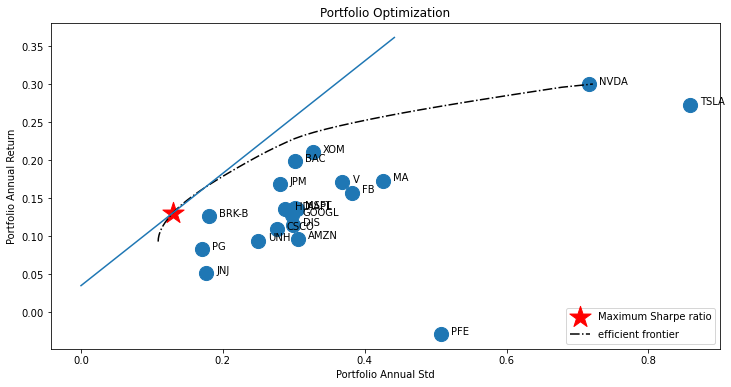

In [78]:
display_ef(stockRet, covariance, 0.0025)